# 대중교통 데이터 읽어오기

- 데이터의 구성 살피고, 필요한 부분도 한번 체크해보고
- reader~ 리드객체 생성
- 5줄만 출력 (루틴)


In [3]:
import csv
with open('subwayfee.csv', encoding = 'utf-8-sig') as f:
                    # utf-8로만 하면, 헤더 부분에\ufeff이 출력됨
                    # 해결책으로 utf-8-sig로 해도 되고, notepad++에서 변환해도 됨
                    # euc_kr로 하면, 나타나지 않기는 함
                
    data = csv.reader(f)
    header = next(data)
    print(header)
    i = 0
    for row in data:
        print(row)
        if i > 5:
            break
        i += 1
        
# 6월달로 한정했으니 사용월은 무의미 => 필요한 정보가 있는 것 확인

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '1호선', '150', '서울역', '1150754', '1123193', '194717', '187155']
['Jun-22', '1호선', '151', '시청', '537067', '543569', '80671', '78279']
['Jun-22', '1호선', '152', '종각', '834173', '815704', '131987', '121717']
['Jun-22', '1호선', '153', '종로3가', '450317', '404106', '299617', '278151']
['Jun-22', '1호선', '154', '종로5가', '394420', '404105', '254236', '244555']
['Jun-22', '1호선', '155', '동대문', '212719', '198987', '117499', '118515']
['Jun-22', '1호선', '156', '신설동', '264825', '252339', '112362', '106855']


In [4]:
import csv
with open('subwayfee.csv', encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    header = next(data)
    
    max_rate = 0
    rate = 0
    
    for row in data:
        for i in range(4,8):
            row[i] = int(row[i])
        rate = row[4] / row[6]
        
        if rate > max_rate:
            max_rate = rate
    print(max_rate)

ZeroDivisionError: division by zero

- 무임승차인원이 없을 수도 있음 (분모가 0일 수도 있다는 것)
 => 그래서 유임승차인원/무임승차인원 하면 오류가 날 수 있음

- $rate = {유임승차인원 \over 무임승차인원}$  

 -> 수식은 ($, 중괄호, \over  활용)

- 유임승차 인원은 4번 인덱스 / 무임승차 인원은 6번 인덱스  
 => 무임승차가 없는 역이 있어서 zero~ 오류뜸  
 => 해결: $rate = {유임승차인원 \over 유임승차인원+무임승차인원}$

In [92]:
import csv
with open('subwayfee.csv', encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    header = next(data)
    
    max_rate = 0
    rate = 0
    i = 0

    for row in data:
        for i in range(4,8):
            row[i] = int(row[i])  # 4, 5, 6, 7 컬럼값을 정수로 변환
        rate = row[4] / (row[4] + row[6]) # 단순 비율만 계산
        
        if row[6] == 0:          # 무임승차 인원[6]이 없는 역 출력
            print(row)
            
# 일일이 엑셀(원본데이터)를 보고 확인할 수 없음
# 이런식으로 0이 있는 행을 확인해보면서 해야함

['Jun-22', '일산선', '1949', '지축', 10, 0, 0, 0]
['Jun-22', '경의선', '1296', '계양', 10, 0, 0, 0]
['Jun-22', '경의선', '1297', '검암', 2, 0, 0, 0]
['Jun-22', '6호선', '2615', '연신내', 31, 0, 0, 0]
['Jun-22', '6호선', '2649', '신내', 4, 0, 0, 0]
['Jun-22', '7호선', '2753', '까치울', 1, 0, 0, 0]
['Jun-22', '7호선', '2758', '상동', 1, 0, 0, 0]
['Jun-22', '7호선', '2761', '부평구청', 1, 0, 0, 0]


# 최대 무임 승차 비율 확인

In [6]:
import csv
f = open('subwayfee.csv', encoding = 'utf-8-sig')
data = csv.reader(f)
next(data)

max_rate = 0 # 초기화
rate = 0  # 초기화

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])  # 문자열을 정수로 변환
        
    if row[6] != 0:
        rate = (row[6]*100) / (row[4]+row[6]) # 무임승차수 /(유임승차수+무임승차수)
        if rate > max_rate:    # 최고값들을 갱신해나가는 것
            max_rate = rate
            print(row, round(rate, 2), '%')  # 무임승차 %가 최고인 역을 찾는 과정 출력

# 1번 밖에 없으므로 무의미하긴 함

['Jun-22', '1호선', '150', '서울역', 1150754, 1123193, 194717, 187155] 14.47 %
['Jun-22', '1호선', '153', '종로3가', 450317, 404106, 299617, 278151] 39.95 %
['Jun-22', '1호선', '157', '제기동', 218782, 209109, 263173, 281985] 54.61 %
['Jun-22', '경원선', '1916', '소요산', 32659, 25998, 62990, 56806] 65.86 %
['Jun-22', '7호선', '2756', '신중동', 0, 0, 1, 0] 100.0 %


# 최대 유임 승차 인원이 있는 역은? #1

In [100]:
import csv
f = open('subwayfee.csv', encoding = 'utf-8-sig')
data = csv.reader(f)
header = next(data)
print(header)

max_rate = 0 # 초기화
rate = 0  # 초기화

max_row = []
total_count = 0
max_total_num = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])      # 문자열을 정수로 변환
    total_count = row[4] + row[6] # 유임승차수 + 무임승차수
    
    if (row[6] != 0) and (total_count > 100000):   # 조건
        rate = row[4] / total_count
        if rate > max_rate:           # 최대값 if 과정
            max_rate = rate
            max_row = row              # 최대값인 행의 전체정보
            max_total_num = total_count
            
print(max_row)
print('역이름: {0}, 전체 인원: {1:,}, 유임승차인원: {2:,}, 유임승차 비율: {3:,}'.format(max_row[3], max_total_num, max_row[4], round(max_rate, 2)))
# 4가지 정보 출력

f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '2호선', '209', '한양대', 269240, 295829, 12481, 13227]
역이름: 한양대, 전체 인원: 281,721, 유임승차인원: 269,240, 유임승차 비율: 0.96


# 최대 유임 승차 인원이 있는 역은? #2

# 실습 : 유임 승차 비율이 50% 이하인 역

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['Jun-22', '1호선', '157', '제기동', 218782, '209109', 263173, '281985'] 0.45
['Jun-22', '1호선', '159', '동묘앞', 122460, '131299', 146455, '147539'] 0.46
['Jun-22', '경원선', '1916', '소요산', 32659, '25998', 62990, '56806'] 0.34
['Jun-22', '중앙선', '1218', '원덕', 5854, '5749', 6959, '6739'] 0.46
['Jun-22', '중앙선', '1219', '용문', 34168, '34477', 38467, '38202'] 0.47
유임 승차 비율이 가장 낮은 역: 소요산, 전체 인원:95,649, 유임승차인원:32,659, 유임승차비율:0.34


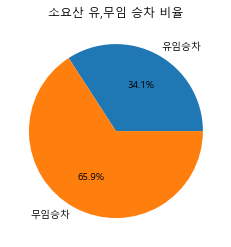

In [8]:
# 5번 7번 인덱스는 안쓰니까 4,6번만 가져온다는 것

import csv
import matplotlib.pyplot as plt
import platform
f = open('subwayfee.csv', encoding = 'utf-8-sig')
data = csv.reader(f)
header = next(data)
print(header)
                 # 최소값 (최대값도 마찬가지) 구하는 패턴
min_rate = 100   # 나올 수 없는 많이 큰 값을 적지
rate = 0
min_row = []
total_count = 0
min_total_count = 0

for row in data:
    for i in [4,6]:
        row[i] = int(row[i])
    total_count = row[4] + row[6]
                                                  # 조건1
    if (row[6] != 0) and (total_count >= 10000): # 무임승차 인원이 없고, 총 승차인원이 1만명 이상
        rate = row[4] / total_count
        if rate <= 0.5:  # 조건2
            print(row, round(rate, 2))
            if rate < min_rate: # 유임 승차 비율이 가장 낮은 역 찾기
                min_rate = rate  # 최소값으로 갱신해나가는 것
                min_row = row    # 사진 찍은 것
                min_total_count = total_count
print('유임 승차 비율이 가장 낮은 역: {0}, 전체 인원:{1:,}, 유임승차인원:{2:,}, 유임승차비율:{3:,}'.
    format(min_row[3], min_total_count, min_row[4], round(min_rate, 2)))

f.close()

if(platform.system() == 'Windows'):
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

plt.title(min_row[3] + " 유,무임 승차 비율")
label = ['유임승차', '무임승차']
values = [min_row[4], min_row[6]]

plt.pie(values, labels=label, autopct='%.1f%%')  # auto percentage (자동으로 퍼센트 채워줌)
plt.show()                                       # 특수기호라서 %자체 출력을 위해 2개(%%) 출력


# values = [값1, 값2]
# => 자동으로 값1 / 값1+값2, 값2 / 값1+값2로 만들어줌

# 승·하차 인원이 가장 많은 역은?

In [104]:
# 파일을 저장하려면 반드시 닫아야 하지
# with 문만 반복되는 것이지 아래 블록으로 들어간 부분이 반복 되는 것은 아님

import csv
max = [0] * 4
# [0]: 최대 유임승차,[1]: 최대 유임하차, [2]: 최대 무임승차, [3]: 최대 무임하차
# 4개의 최대값을 저장하기 위핸 리스트
max_station = [''] * 4
label = ['유임승차', '유임하차', '무임승차', '무임하차']

with open('subwayfee.csv', encoding = 'utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    
    for row in data:      # 1줄씩 데이터 읽기를 한 것 (csv 파일 읽는 방법)
        for i in range(4,8):  
            row[i] = int(row[i])  # 갖고 온 컬럼 정수로 변환
            if row[i] > max[i-4]:
                max[i-4] = row[i] # 위에서 만들었던 max와 max_station 배열에 넣기 위해서 -4를 해 준 것
                                  # 캡처 확인 (6번?)
                max_station[i-4] = row[3] + ' ' + row[1] # '역이름' + ' ' + '지하철호선' 추가
                
for i in range(4):
    print('{0}: {1} {2:,}'.format(label[i], max_station[i], max[i]))

유임승차: 강남 2호선 2,055,521
유임하차: 강남 2호선 2,039,847
무임승차: 종로3가 1호선 299,617
무임하차: 제기동 1호선 281,985


In [106]:
# 200dpi로 씀 => 파이차트 크기 조절
# 확인해야

import csv
import matplotlib.pyplot as plt
import platform
label = ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF'] # 파이차트 컬러 값
pic_count = 0

with open('subwayfee.csv', encoding='utf-8-sig') as f:
    data = csv.reader(f)
    next(data)
    
    if(platform.system() == 'Windows'):
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppleGothic')
    
    for row in data:
        for i in range(4, 8):
            row[i] = int(row[i])
        plt.figure(dpi=200) # 저장할 그림파일의 dpi 설정
        plt.title(row[3] + ' ' + row[1])
        plt.pie(row[4:8], labels=label, colors=c, autopct = '%.1f%%')
        plt.savefig(row[3] + ' ' + row[1] + '.png')
        plt.close() # 파일 닫기
               
        pic_count += 1
        if pic_count >= 3:
            break


In [27]:
#16

# 전체 지하철 역 파이차트 분석

In [28]:
# 논문이나 도서에서 주로
#17

In [ ]:
# 7번 캡처 + array 
# 1줄 읽어와서 4칸 채운 리스트들을 바로 pie차트로 넘김
# (아래 3줄 지우면 만드는 많은 과정 볼 수 있겠지)


# 2. 지하철 시간대별 데이터 시각화

한 행에 컬럼이 죽 다 들어가 있었으나, 두줄로 되어 있는 부분도 많음
#19
인덱스 0번부터 3번까지는 xx
인덱스 4번부터 51번까지 쓰는 것

< 해당 데이터 파일이 어떻게 구성되어있는지 파악하는 것이 먼저 >
- 해당 데이터에서는 환승을 파악할 수 없음
- 두 줄의 헤더 정보를 포함하고 있음

#7
map()
- 첫번째 인자는 함수이름, 두번째는 실제 데이터

# map() 함수

In [22]:
data = ['1','2','3','4']
data = list(map(int,data)) # 문자열 형태의 자료를 일괄적으로 정수형으로 변환
                           # map형태의 데이터를 list로 변경
print(data, data[0], type(data[0]))

[1, 2, 3, 4] 1 <class 'int'>


In [19]:
def func(x):
    return x**2

a = [1, 2, 3, 4]
a = list(map(func, a)) # 각 숫자의 제곱
print(a)

[1, 4, 9, 16]


# 새벽 4시 지하철 승차 전체 인원

In [ ]:
# 헤더 정보 건너뛰는 캡처

# 시간대별 지하철 이용 인원 수

In [110]:
import csv

result = []
total_number = 0

with open('subwaytime.csv', encoding = 'utf-8') as f:
    data = csv.reader(f)
    next(data) #2줄의 헤더 정보를 건너뜀
    next(data)

    for row in data:
        row[4:] = map(int, row[4:]) # 문자열을 숫자로 변경
        total_number += row[4]
        result.append(row[4]) # row[4] : 새벽 4시에 승차한 인원
                              # 아래로 죽 길게 뽑아내겠징~? 데이터 추가하면서

print('총 지하철 역의 수:', len(result))
print('새벽 4시 승차인원: {:,}'.format(total_number))

총 지하철 역의 수: 615
새벽 4시 승차인원: 135,398


# 새벽4시 지하철 이용 인원 수 (그래프)

In [ ]:
#22
# 정렬한 그래프를 그린 것
# 새벽4시 승차인원을 추가
# ex) result.sort(reverse = True/False) Top N 뽑기 용이
# -> rewult 본인이 갖고 있는 것 자체가 바뀐 것
# sort : 원본 리스트가 변경 (내부 값이 바뀜)
# sorted : 원본은 유지하고, 새롭게 정렬도니 리스트 생성

In [113]:
import csv
import matplotlib.pyplot as plt

with open('subwaytime.csv', encoding = 'utf-8') as f:
    data = csv.reader(f)
    next(data) #2줄의 헤더 정보를 건너뜀
    next(data)
    
    result = []
    total_number = 0
    max_num = 0
    max_station = ''

    for row in data:
        row[4:] = map(int, row[4:]) # 문자열을 숫자로 변경
        total_number += row[4]
        result.append(row[4]) # row[4] : 새벽 4시에 승차한 인원
                              # 아래로 죽 길게 뽑아내겠징~? 데이터 추가하면서
        if(row[4] > max_num):      # 새벽 4시 승차 인원을 추가
            max_num = row[4]       # 최대값 최신화
            max_station = row[3]   # 최신화 시키는 최대값이 들어왔을 때만 max_station이 입력되겠지.
            
print('새벽 4시 승차 인원수: {0:,}'.format(total_number))
print('최대 승차역: {0}, 인원수:{1:,}'.format(max_station, max_num))

새벽 4시 승차 인원수: 135,398
최대 승차역: 구로, 인원수:11,784


<BarContainer object of 615 artists>

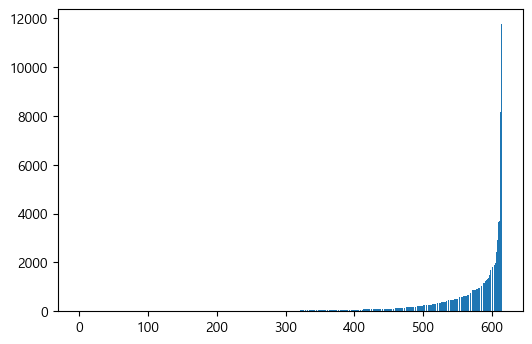

In [115]:
result.sort() # 오름 차순으로 정렬, 내림차순: result.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(result)), result)

#24
-짝수 인덱스 => 승차 / 홀수 인덱스 => 하차


# 실습 : 출근 시간대 지하철 이용 현황 #2

최대 승차 인원역: 신림(2호선) 638,753


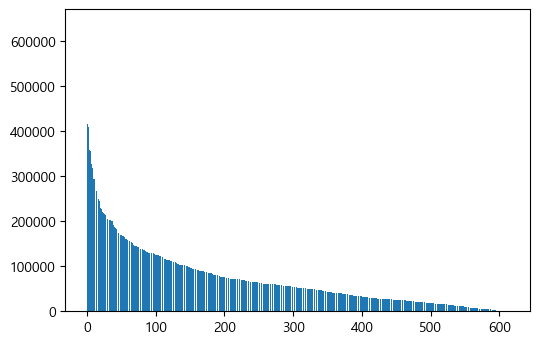

In [33]:
import csv
import matplotlib.pyplot as plt

with open('subwaytime.csv', encoding = 'utf-8' ) as f:
    data = csv.reader(f)
    next(data) # 2줄의 헤더 정보 건너뜀
    next(data)
    
    result = []
    total_number = 0
    max_num = 0
    max_station = ''
    
    for row in data:
        row[4:] = map(int, row[4:])
        row_sum = sum(row[10:15:2]) # index 10, 12, 14
        # row_sum = row[10] + row[12] + row[14]
        result.append(row_sum)
        
        if row_sum > max_num:
            max_num = row_sum
            max_station = row[3] + '(' + row[1] + ')'
            
print('최대 승차 인원역: {0} {1:,}'.format(max_station, max_num))
result.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(result)), result)
plt.show()

# 시간대별 가장 많이 승차하는 역 정보 분석

- 시간대별 최대값을 뽑아내는

In [ ]:
#4~27 
# 34,24,0,1,2 이렇게 순환하는 것을 표시하기 위해 /24
# xtick_~ : 그래프 x축 레이블
# 승차인원만 갖고 올 것이고, 2개씩 건너뛸 것이기 때문
# [0] => 4시 시작
# i * 2 + 4([4]부터 시작하니까)
# -> j = 0이라면, data[4]. 즉 새벽4시 값을 갖고 오는 것
#27 : 그래프를 위한 소스코든
# -> x라벨. 즉, xstick들을 살짝 기울여서 최대한 많은 것들을 x좌표에 기록하기 위해 기울여줌

In [116]:
import csv
import matplotlib.pyplot as plt
import platform

with open('subwaytime.csv', encoding = 'utf-8') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    
    max =[0] * 23 # 새벽 3시는 지하철 운행 안함
    max_station = [''] * 23
    xtick_list = []
    
    for i in range(4, 27):
        n = i % 24 # 4, 5, 6, ... 23, 0, 1, 2시로 표시
        xtick_list.append(str(n))
        
    for row in data:
        row[4:] = map(int, row[4:])
            
    for j in range(23):
        a = row[j*2 +4]
        if  a > max[j]:
            max[j] = a
            max_station[j] = xtick_list[j] + '시:' + row[3] #4시: 구로
        
    for i in range(len(max)):
        print('{0}: {1:,}'.format(max_station[i], max[i]), end=', ')
        if (i+1) % 4 == 0: # 한 줄에 6개씩 출력
            print()

4시:관악산(서울대): 2, 5시:관악산(서울대): 475, 6시:관악산(서울대): 1,258, 7시:관악산(서울대): 4,086, 
8시:관악산(서울대): 4,382, 9시:관악산(서울대): 3,446, 10시:관악산(서울대): 4,042, 11시:관악산(서울대): 5,471, 
12시:관악산(서울대): 7,264, 13시:관악산(서울대): 8,889, 14시:관악산(서울대): 10,156, 15시:관악산(서울대): 12,362, 
16시:관악산(서울대): 12,217, 17시:관악산(서울대): 10,329, 18시:관악산(서울대): 7,512, 19시:관악산(서울대): 2,774, 
20시:관악산(서울대): 1,864, 21시:관악산(서울대): 1,267, 22시:관악산(서울대): 1,000, 23시:관악산(서울대): 485, 
0시:관악산(서울대): 90, 1시:관악산(서울대): 1, : 0, 

4시:관악산(서울대): 2, 5시:관악산(서울대): 475, 6시:관악산(서울대): 1,258, 7시:관악산(서울대): 4,086, 
8시:관악산(서울대): 4,382, 9시:관악산(서울대): 3,446, 10시:관악산(서울대): 4,042, 11시:관악산(서울대): 5,471, 
12시:관악산(서울대): 7,264, 13시:관악산(서울대): 8,889, 14시:관악산(서울대): 10,156, 15시:관악산(서울대): 12,362, 
16시:관악산(서울대): 12,217, 17시:관악산(서울대): 10,329, 18시:관악산(서울대): 7,512, 19시:관악산(서울대): 2,774, 
20시:관악산(서울대): 1,864, 21시:관악산(서울대): 1,267, 22시:관악산(서울대): 1,000, 23시:관악산(서울대): 485, 
0시:관악산(서울대): 90, 1시:관악산(서울대): 1, : 0, 

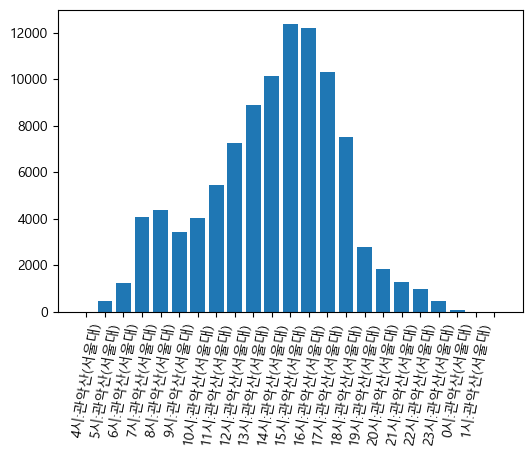

In [43]:
import csv
import matplotlib.pyplot as plt
import platform

with open('subwaytime.csv', encoding = 'utf-8') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    
    max =[0] * 23 # 새벽 3시는 지하철 운행 안함
    max_station = [''] * 23
    xtick_list = []
    
    for i in range(4, 27):
        n = i % 24 # 4, 5, 6, ... 23, 0, 1, 2시로 표시
        xtick_list.append(str(n))
        
    for row in data:
        row[4:] = map(int, row[4:])
        
    for j in range(23):
        a = row[j * 2 + 4] # j=0: data[j*2+4]의 값을 max[0]에 저장하기 위함
        if a > max[j]:
            max[j] = a
            max_station[j] = xtick_list[j] + '시:' + row[3] # 4시: 구로

    for i in range(len(max)):
        print('{0}: {1:,}'.format(max_station[i], max[i]), end=', ')
        if (i+1) % 4 == 0: # 한 줄에 6개씩 출력
            print()
            
if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')
else:
    plt.rc('font', family = 'AppleGothic')

plt.figure(dpi=100)
plt.bar(range(23), max)
plt.xticks(range(23), max_station, rotation=80)
plt.show()

In [34]:
for i in range(4,27):
    n = i % 24 
    print(n, end= ' ')
print()

4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 0 1 2 


# 모든 지하철역에서 시간대별 승하차 인원?

In [ ]:
# key와 value로 정렬하려는 것은 힘듦
# => lambda를 활용 -> 그나마 쉬운뎅 (그나마 더 많이 사용하는 편)

# item으로 부르면, key[0], value[1]로 출력 가능하지
# 금일 과제에서 쓸 일은 없을 것이공


# Pandas 활용
- #31
- 엑셀파일 받은 것 그대로 활용

In [62]:
# 특정한 시트만 갖고 오고 싶을 때 사용
# 헤더에 대한 정보 (접때도 거르기 힘들었던 것)
# -> 어디까지가 헤더인지
# [0]~[3] => 판다스에서는 빈칸이 unnmaed 이렇게 떠버림 (접때 처럼) 
# -> 
# 하차 위쪽 칸도 함께 시간을 나타내는 칸이 붙어 있는 것으로 보면 됨
# (컬럼을 확인하면 승차, 하차의 시간이 같게 나타나는 것을 볼 수 있음)

- 멀티 인덱스의 경우, 튜플 형식으로 접근
- 적혀 있는 그대로 적어(~#33) -> 해당 데이터로 가져옴
- df[행, 열]
  df[1:5, 2:10]
  df[ : , [1,3,10,12,14]]
  
 - 필요한 것만 뽑아서, DF를 줄인 것
- objec -> 문자열 형태 -> 숫자로 변경해야 할 듯 (for 연산 등)
- apply() -> 전체 모든 행들에 적용
- lambda x : x.replace(',', '')
 -> x는 '입력된 데이터1개' 라고 생각하기
 
 < 엑셀, 멀티인덱스 일 때 >  
 엑셀 부르고  
 헤더 확인(헤더부분 처리 중요)  
 컬럼 정보 확인  
 필요한 데이터 잘라 오기  
 
 각각의 컬럼에 접근할 때, 튜플 형태로 접근했다는 것 주의  
 1000단위 콤마(,) 제거  
 data type 변경  
 DF의 연산  

In [74]:
import pandas as pd

df = pd.read_excel('subway.xls', sheet_name = '지하철 시간대별 이용현황', header=[0,1])
df

사용월                호선명                역ID  \
    Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0              2022-06                1호선                150   
1              2022-06                1호선                151   
2              2022-06                1호선                152   
3              2022-06                1호선                153   
4              2022-06                1호선                154   
..                 ...                ...                ...   
610            2022-06                신림선               4407   
611            2022-06                신림선               4408   
612            2022-06                신림선               4409   
613            2022-06                신림선               4410   
614            2022-06                신림선               4411   

                  지하철역 04:00:00~04:59:59     05:00:00~05:59:59         \
    Unnamed: 3_level_1                승차  하차                승차     하차   
0                  서울역               646  24             8,433  7,694   
1                   시청               271   7             3,133  4,802   
2                   종각                91   9             4,007  3,960   
3                 종로3가               190  12             3,882  3,261   
4                 종로5가                34   0             1,730  3,909   
..                 ...               ...  ..               ...    ...   
610                 당곡                 0   0             1,061    118   
611                 신림                 2   1               651    153   
612                 서원                 2   1             1,287    151   
613            서울대벤처타운                10   3             3,314    166   
614           관악산(서울대)                 2   5               475    742   

    06:00:00~06:59:59          ... 23:00:00~23:59:59          \
                   승차      하차  ...                승차      하차   
0              12,608  46,963  ...            20,385  15,480   
1               3,321  23,621  ...             9,254   2,938   
2               3,682  22,533  ...            27,781   3,590   
3               3,570  14,038  ...            17,170   4,119   
4               2,986  16,406  ...             6,208   2,628   
..                ...     ...  ...               ...     ...   
610             2,650     704  ...               822   2,710   
611               853     488  ...               770   2,023   
612             2,552     513  ...               349   3,281   
613             5,162   1,676  ...             1,201   7,279   
614             1,258   1,712  ...               485   1,224   

    00:00:00~00:59:59        01:00:00~01:59:59     02:00:00~02:59:59     \
                   승차     하차                승차  하차                승차 하차   
0                 158  1,332                 1   4                 0  1   
1                  72    422                 0   2                 0  0   
2                 315    394                 0   1                 0  0   
3                 310    843                 3   3                 0  0   
4                  98    668                 0   0                 0  0   
..                ...    ...               ...  ..               ... ..   
610               156    637                 0   0                 0  0   
611               177    629                 0   1                 0  0   
612                68    782                 2   2                 0  0   
613               180  1,974                 1  40                 0  0   
614                90    412                 1  33                 0  0   

    03:00:00~03:59:59     
                   승차 하차  
0                   0  0  
1                   0  0  
2                   0  0  
3                   0  0  
4                   0  0  
..                ... ..  
610                 0  0  
611                 0  0  
612                 0  0  
613                 0  0  
614                 0  0  

[615 rows x 52 columns]

In [75]:
df.columns

MultiIndex([(              '사용월', 'Unnamed: 0_level_1'),
            (              '호선명', 'Unnamed: 1_level_1'),
            (              '역ID', 'Unnamed: 2_level_1'),
            (             '지하철역', 'Unnamed: 3_level_1'),
            ('04:00:00~04:59:59',                 '승차'),
            ('04:00:00~04:59:59',                 '하차'),
            ('05:00:00~05:59:59',                 '승차'),
            ('05:00:00~05:59:59',                 '하차'),
            ('06:00:00~06:59:59',                 '승차'),
            ('06:00:00~06:59:59',                 '하차'),
            ('07:00:00~07:59:59',                 '승차'),
            ('07:00:00~07:59:59',                 '하차'),
            ('08:00:00~08:59:59',                 '승차'),
            ('08:00:00~08:59:59',                 '하차'),
            ('09:00:00~09:59:59',                 '승차'),
            ('09:00:00~09:59:59',                 '하차'),
            ('10:00:00~10:59:59',                 '승차'),
            ('10:00:00~10:59:59

In [119]:
df[('04:00:00~04:59:59', '승차')]
df[('04:00:00~04:59:59', '하차')]

0      24
1       7
2       9
3      12
4       0
       ..
610     0
611     1
612     1
613     3
614     5
Name: (04:00:00~04:59:59, 하차), Length: 615, dtype: int64

In [76]:
df[('호선명','Unnamed: 1_level_1')]

0      1호선
1      1호선
2      1호선
3      1호선
4      1호선
      ... 
610    신림선
611    신림선
612    신림선
613    신림선
614    신림선
Name: (호선명, Unnamed: 1_level_1), Length: 615, dtype: object

In [77]:
df[('지하철역', 'Unnamed: 3_level_1')]

0           서울역
1            시청
2            종각
3          종로3가
4          종로5가
         ...   
610          당곡
611          신림
612          서원
613     서울대벤처타운
614    관악산(서울대)
Name: (지하철역, Unnamed: 3_level_1), Length: 615, dtype: object

In [78]:
commute_time_df = df.iloc[:, [1, 3, 10, 12, 14]]
commute_time_df.head()

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,승차,승차,승차
0,1호선,서울역,"39,233","65,106","54,833"
1,1호선,시청,"6,647","8,294","9,211"
2,1호선,종각,"5,814","9,612","11,847"
3,1호선,종로3가,"4,746","8,589","13,179"
4,1호선,종로5가,"5,020","8,550","11,925"


In [79]:
commute_time_df.dtypes

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                    object
08:00:00~08:59:59  승차                    object
09:00:00~09:59:59  승차                    object
dtype: object

In [85]:
commute_time_df[('07:00:00~07:59:59', '승차')] = commute_time_df[('07:00:00~07:59:59', '승차')].apply(lambda x : x.replace(',',''))
commute_time_df[('08:00:00~08:59:59', '승차')] = commute_time_df[('08:00:00~08:59:59', '승차')].apply(lambda x : x.replace(',',''))
commute_time_df[('09:00:00~09:59:59', '승차')] = commute_time_df[('09:00:00~09:59:59', '승차')].apply(lambda x : x.replace(',',''))
commute_time_df

C:\Users\ahasu\AppData\Local\Temp\ipykernel_9908\3642604935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_time_df[('07:00:00~07:59:59', '승차')] = commute_time_df[('07:00:00~07:59:59', '승차')].apply(lambda x : x.replace(',',''))
C:\Users\ahasu\AppData\Local\Temp\ipykernel_9908\3642604935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_time_df[('08:00:00~08:59:59', '승차')] = commute_time_df[('08:00:00~08:59:59', '승차')].apply(lambda x : x.replace(',',''))
C:\Users\ahasu\AppData\Local\Tem

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,승차,승차,승차
0,1호선,서울역,39233,65106,54833
1,1호선,시청,6647,8294,9211
2,1호선,종각,5814,9612,11847
3,1호선,종로3가,4746,8589,13179
4,1호선,종로5가,5020,8550,11925
...,...,...,...,...,...
610,신림선,당곡,7708,11603,6862
611,신림선,신림,3099,5402,2941
612,신림선,서원,8427,12646,7590


In [86]:
commute_time_df = commute_time_df.astype({('07:00:00~07:59:59', '승차'):'int64'})
commute_time_df = commute_time_df.astype({('08:00:00~08:59:59', '승차'):'int64'})
commute_time_df = commute_time_df.astype({('09:00:00~09:59:59', '승차'):'int64'})
commute_time_df.dtypes

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                     int64
08:00:00~08:59:59  승차                     int64
09:00:00~09:59:59  승차                     int64
dtype: object

In [87]:
row_sum_df = commute_time_df.sum(axis=1)
passenger_number_list = row_sum_df.to_list()

C:\Users\ahasu\AppData\Local\Temp\ipykernel_9908\1623111422.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_sum_df = commute_time_df.sum(axis=1)


In [88]:
max_number = row_sum_df.max(axis=0) # 해당 열에서 최대값 찾기
max_number

638753

In [125]:
max_index = row_sum_df.idxmax()
max_line, max_station = df.iloc[max_index, [1, 3]] # [1]: 호선,[3]: 지하철역명
print('출근 시간대 최대 승차 인원역: {0} {1} {2:,}명'.format(max_line,max_station, max_number))

출근 시간대 최대 승차 인원역: 2호선 신림 638,753명


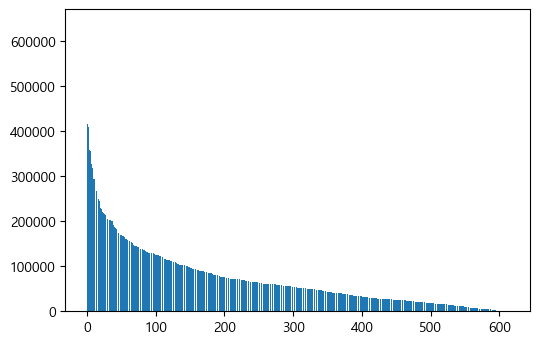

In [90]:
import matplotlib.pyplot as plt
passenger_number_list.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(passenger_number_list)), passenger_number_list)
plt.show()

In [ ]:
#35 수정 -> 영어로 보면 됨
# df.idxmax() -> 최대값이 있는 인덱스 출력
# df.iloc[max_index, [1,3]] -> 원본에서 최대값 index의 지하철역 정보를 찾음
# 잘라낸 df에서 최대값과 인덱스값을 뽑아낸 것은 원본 DF에다가 써야 함
# 쉽게 잘라가면서 df를 작게 만들어가고 -> 조건에 맞는 인덱스를 찾아 -> 원본 df에다가 적어서 뽑아
# 아예 원본 df를 새로 만든다는 생각으로 하든지
# -> but, 일부 데이터 뽑아서 하려면 오류가 생길 확률이 높다고 함

# DF를 리스트로 변환 -> matplotlib에서 그래프를 그리기 위해서
# 판다스 #4 슬라이스

# 같은 패턴이니까 과제의 경우, 1호선만 하면 7호선까지 죽 파면 됨
# 한번에 다 하지 말고, 1호선만 해보고, 정상 동작 되면 -> 7호선까지 컬럼만 바꿔가면서 죽
# 인덱스 처리 주의

In [129]:
# 한수씨 오류 잡아서 역으로 올라가는 과정 => 흐름타고 역으로 올라가면서 왜 그런지 알 것